In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('../data/Dataset4.csv')

In [4]:
data.head(10)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0.0,400.0,12306.0,18520,939.735,0.0,0.00,0.0,0.000,0.00,0,No
1,1,1654733332,20.015,56.67,0.0,400.0,12345.0,18651,939.744,0.0,0.00,0.0,0.000,0.00,1,No
2,2,1654733333,20.029,55.96,0.0,400.0,12374.0,18764,939.738,0.0,0.00,0.0,0.000,0.00,2,No
3,3,1654733334,20.044,55.28,0.0,400.0,12390.0,18849,939.736,0.0,0.00,0.0,0.000,0.00,3,No
4,4,1654733335,20.059,54.69,0.0,400.0,12403.0,18921,939.744,0.0,0.00,0.0,0.000,0.00,4,No
5,5,1654733336,20.073,54.12,0.0,400.0,12419.0,18998,939.725,0.0,0.00,0.0,0.000,0.00,5,No
6,6,1654733337,20.088,53.61,0.0,400.0,12432.0,19058,939.738,0.0,0.00,0.0,0.000,0.00,6,No
7,7,1654733338,20.103,53.20,0.0,400.0,12439.0,19114,939.758,0.0,0.00,0.0,0.000,0.00,7,No
8,8,1654733339,20.117,52.81,0.0,400.0,12448.0,19155,939.758,0.0,0.00,0.0,0.000,0.00,8,No
9,9,1654733340,20.132,52.46,0.0,400.0,12453.0,19195,939.756,0.9,3.78,0.0,4.369,2.78,9,No


In [5]:
data.drop("Unnamed: 0",axis = 1, inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62484 non-null  float64
 2   Humidity[%]     62383 non-null  float64
 3   TVOC[ppb]       62009 non-null  float64
 4   eCO2[ppm]       62305 non-null  float64
 5   Raw H2          62519 non-null  float64
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62603 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62313 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62378 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  object 
dtypes: float64(11), int64(3), object(1)
memory usage: 7.2+ MB


In [7]:
data= data.rename(columns = {"Fire Alarm" : "Fire_Alarm",
                            "Raw H2" : "Raw_H2",
                            "Raw Ethanol" : "Raw_Ethanol"})

In [8]:
len(sorted (data['UTC'].unique()))

62630

In [9]:
data.dropna(inplace = True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60603 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             60603 non-null  int64  
 1   Temperature[C]  60603 non-null  float64
 2   Humidity[%]     60603 non-null  float64
 3   TVOC[ppb]       60603 non-null  float64
 4   eCO2[ppm]       60603 non-null  float64
 5   Raw_H2          60603 non-null  float64
 6   Raw_Ethanol     60603 non-null  int64  
 7   Pressure[hPa]   60603 non-null  float64
 8   PM1.0           60603 non-null  float64
 9   PM2.5           60603 non-null  float64
 10  NC0.5           60603 non-null  float64
 11  NC1.0           60603 non-null  float64
 12  NC2.5           60603 non-null  float64
 13  CNT             60603 non-null  int64  
 14  Fire_Alarm      60603 non-null  object 
dtypes: float64(11), int64(3), object(1)
memory usage: 7.4+ MB


In [11]:
data.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
count,6.060300e+04,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000
mean,1.654792e+09,15.969422,48.530699,1940.224296,670.565731,12942.483507,19754.829381,938.626170,100.456575,184.535487,489.985977,203.690792,80.250339,10504.482121
std,1.101285e+05,14.364021,8.885096,7803.365405,1910.834428,272.409853,609.240337,1.334196,922.971678,1980.884024,4263.976415,2220.198260,1087.865967,7594.776939
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.980000,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.330000,8.795000,1.381500,0.033000,3622.000000
50%,1.654762e+09,20.130000,50.140000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9323.000000
75%,1.654778e+09,25.410000,53.240000,1189.000000,438.000000,13109.000000,20079.000000,939.417000,2.090000,2.180000,14.420000,2.249000,0.051000,17149.500000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000


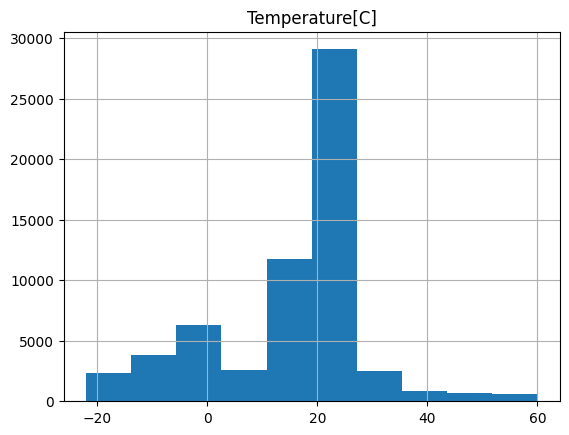

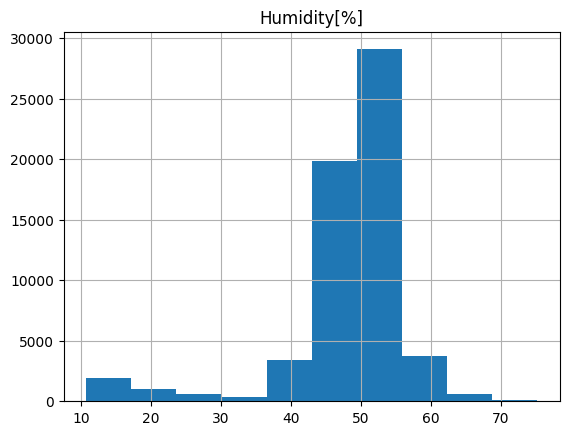

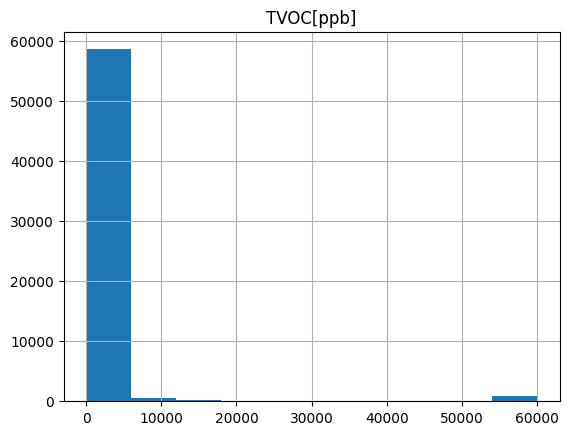

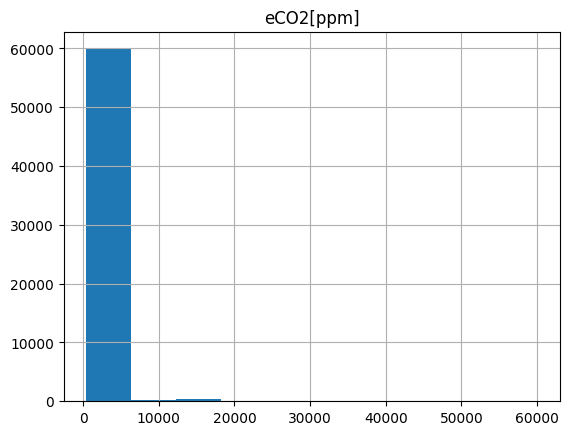

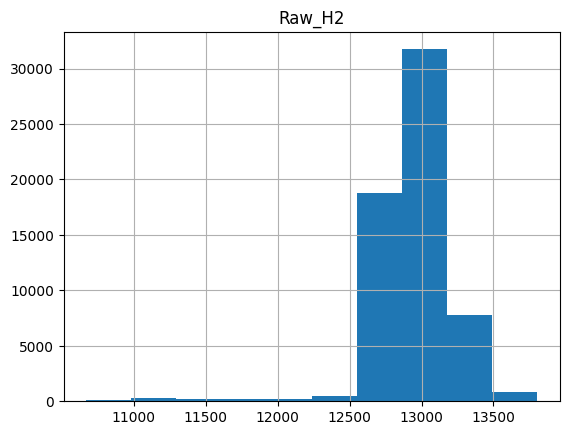

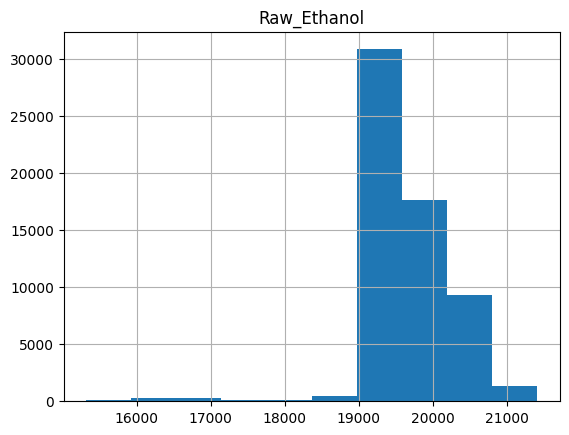

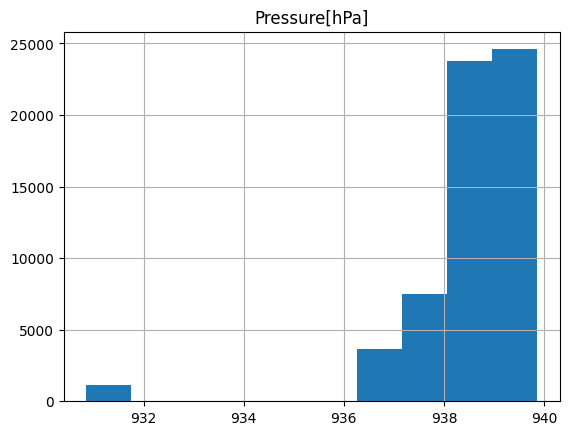

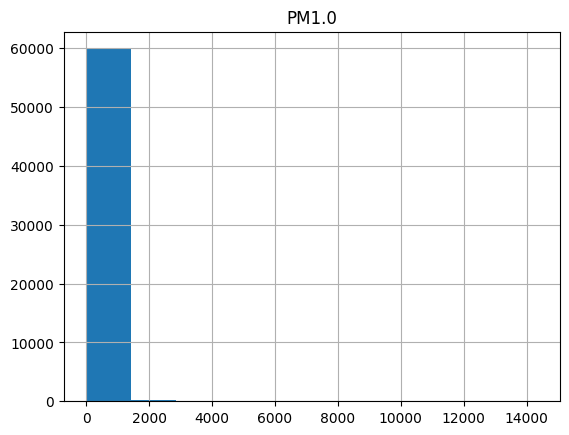

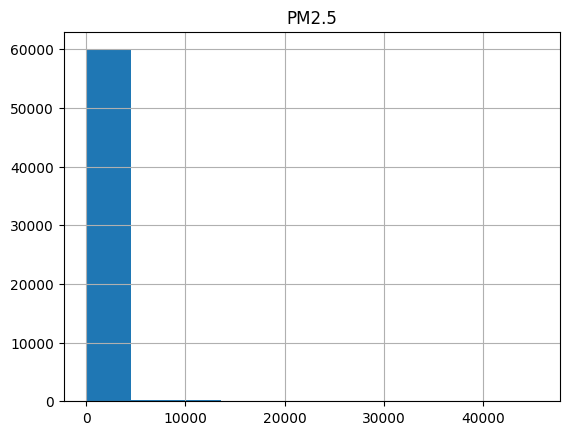

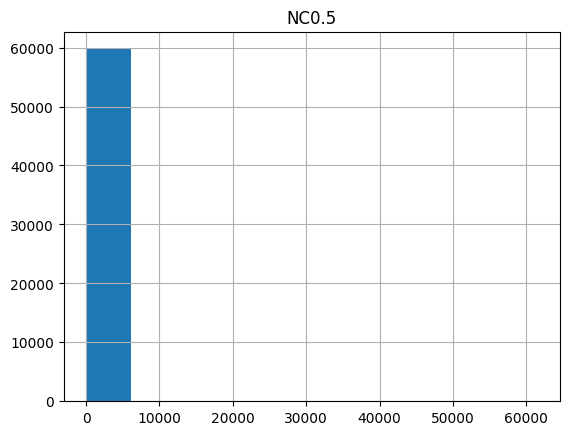

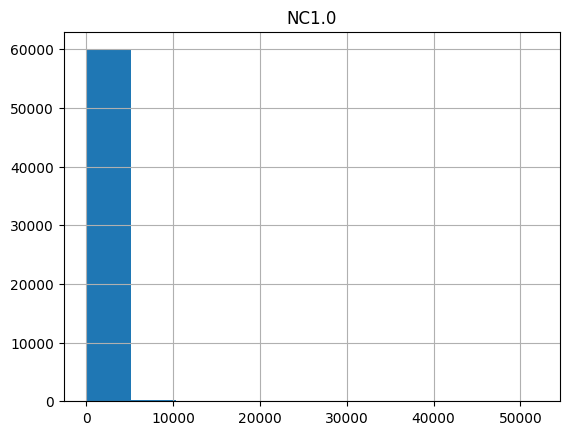

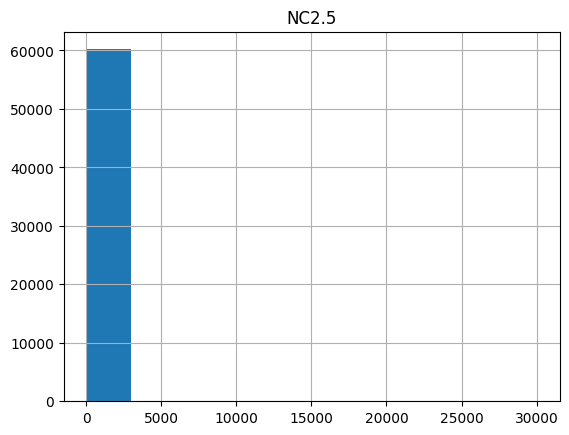

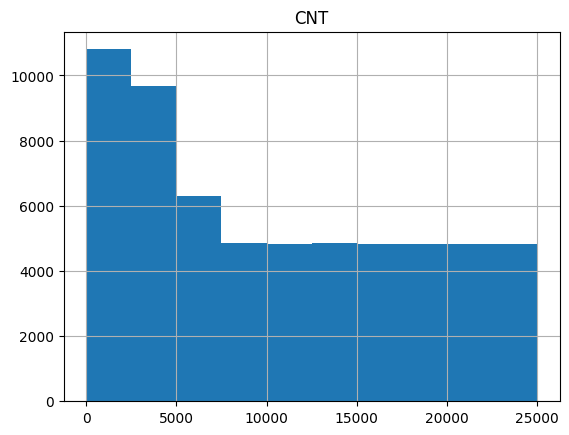

In [12]:
columns = ['Temperature[C]',	'Humidity[%]',	'TVOC[ppb]',	'eCO2[ppm]',	'Raw_H2',	'Raw_Ethanol',	'Pressure[hPa]',	'PM1.0',	'PM2.5',
           'NC0.5',	'NC1.0',	'NC2.5',	'CNT']
for column in columns:
    data.hist(column)

In [13]:
outlier = data[['Temperature[C]',	'Humidity[%]',	'TVOC[ppb]',	'eCO2[ppm]',	'Raw_H2',	'Raw_Ethanol',	'Pressure[hPa]',	'PM1.0',	'PM2.5',
           'NC0.5',	'NC1.0',	'NC2.5',	'CNT']]
outlier

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,20.000,57.36,0.0,400.0,12306.0,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0.0,400.0,12345.0,18651,939.744,0.00,0.00,0.00,0.000,0.000,1
2,20.029,55.96,0.0,400.0,12374.0,18764,939.738,0.00,0.00,0.00,0.000,0.000,2
3,20.044,55.28,0.0,400.0,12390.0,18849,939.736,0.00,0.00,0.00,0.000,0.000,3
4,20.059,54.69,0.0,400.0,12403.0,18921,939.744,0.00,0.00,0.00,0.000,0.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625.0,400.0,13723.0,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739
62626,18.653,15.87,612.0,400.0,13731.0,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740
62627,18.867,15.84,627.0,400.0,13725.0,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741
62628,19.083,16.04,638.0,400.0,13712.0,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742


In [14]:
Q1 = outlier.quantile(0.25)
Q1

Temperature[C]       10.9800
Humidity[%]          47.5300
TVOC[ppb]           130.0000
eCO2[ppm]           400.0000
Raw_H2            12830.0000
Raw_Ethanol       19435.0000
Pressure[hPa]       938.7000
PM1.0                 1.2800
PM2.5                 1.3300
NC0.5                 8.7950
NC1.0                 1.3815
NC2.5                 0.0330
CNT                3622.0000
Name: 0.25, dtype: float64

In [15]:
Q3 = outlier.quantile(0.75)
Q3

Temperature[C]       25.410
Humidity[%]          53.240
TVOC[ppb]          1189.000
eCO2[ppm]           438.000
Raw_H2            13109.000
Raw_Ethanol       20079.000
Pressure[hPa]       939.417
PM1.0                 2.090
PM2.5                 2.180
NC0.5                14.420
NC1.0                 2.249
NC2.5                 0.051
CNT               17149.500
Name: 0.75, dtype: float64

In [16]:
IQR = Q3-Q1

In [17]:
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
238,23.035,51.58,2.0,400.0,12622.0,19693,939.807,0.07,0.12,0.36,0.131,0.047,238
239,23.045,51.37,3.0,400.0,12626.0,19690,939.817,0.08,0.14,0.42,0.151,0.055,239
240,23.056,51.11,1.0,400.0,12626.0,19698,939.810,0.08,0.14,0.43,0.156,0.056,240
247,23.131,50.08,5.0,400.0,12633.0,19696,939.813,0.09,0.17,0.46,0.189,0.074,247
248,23.142,50.00,0.0,400.0,12629.0,19704,939.790,0.10,0.17,0.49,0.189,0.072,248
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51227,28.910,42.89,31.0,415.0,12871.0,20756,937.625,2.15,2.24,14.81,2.310,0.052,85
51229,29.160,41.35,31.0,413.0,12864.0,20766,937.625,2.19,2.27,15.07,2.350,0.053,87
56967,24.173,44.99,17.0,415.0,12863.0,20774,937.630,2.18,2.26,15.00,2.340,0.053,81
56968,24.212,45.00,27.0,426.0,12853.0,20763,937.634,2.18,2.26,15.00,2.339,0.053,82


In [18]:
index_list = list(data_filtered.index.values)

In [19]:
data_filtered = data[data.index.isin(index_list)].copy()
data_filtered.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire_Alarm
238,1654733569,23.035,51.58,2.0,400.0,12622.0,19693,939.807,0.07,0.12,0.36,0.131,0.047,238,No
239,1654733570,23.045,51.37,3.0,400.0,12626.0,19690,939.817,0.08,0.14,0.42,0.151,0.055,239,No
240,1654733571,23.056,51.11,1.0,400.0,12626.0,19698,939.810,0.08,0.14,0.43,0.156,0.056,240,No
247,1654733578,23.131,50.08,5.0,400.0,12633.0,19696,939.813,0.09,0.17,0.46,0.189,0.074,247,No
248,1654733579,23.142,50.00,0.0,400.0,12629.0,19704,939.790,0.10,0.17,0.49,0.189,0.072,248,No


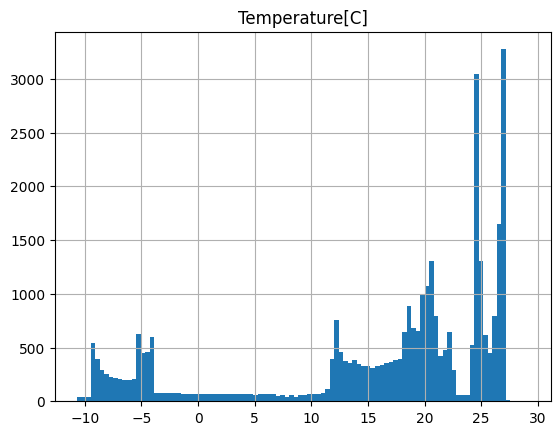

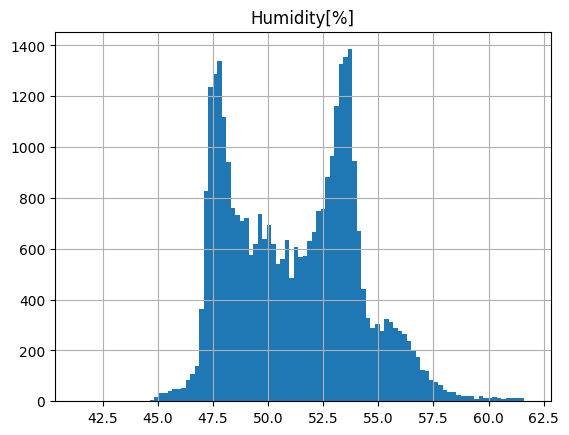

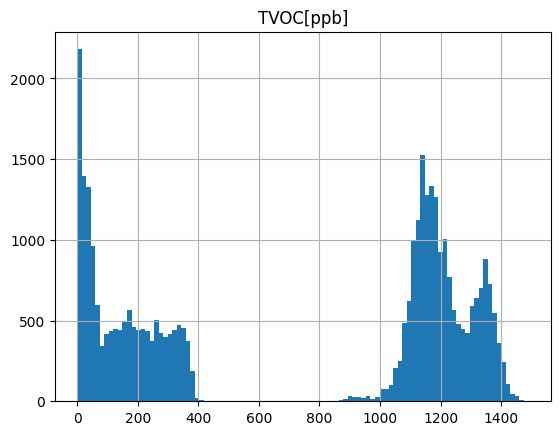

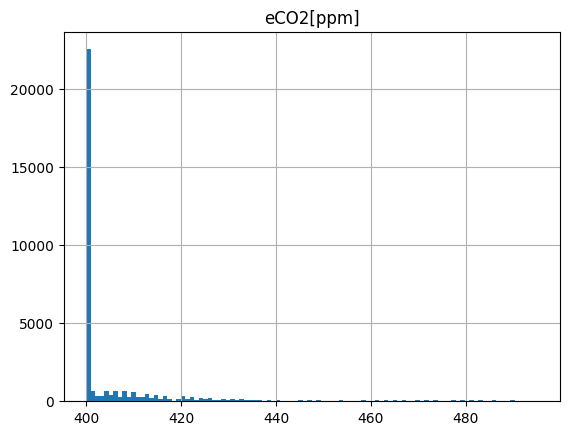

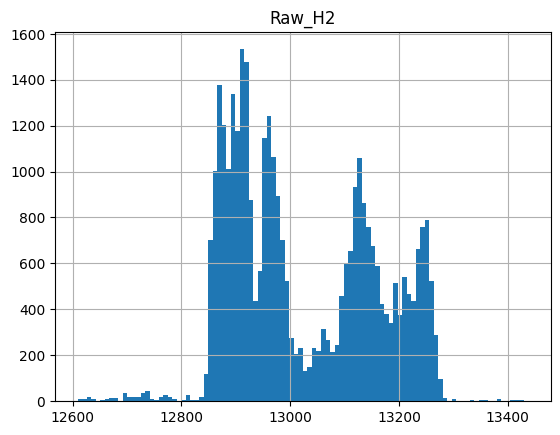

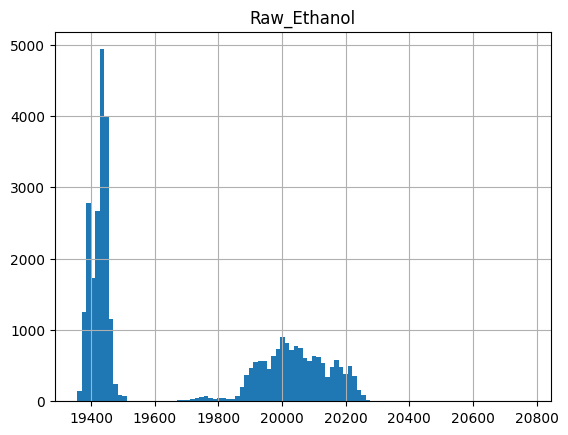

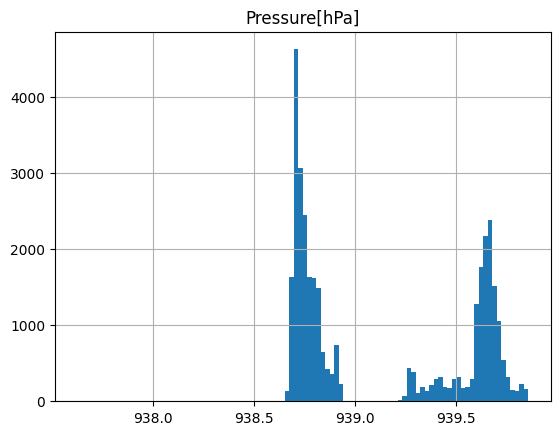

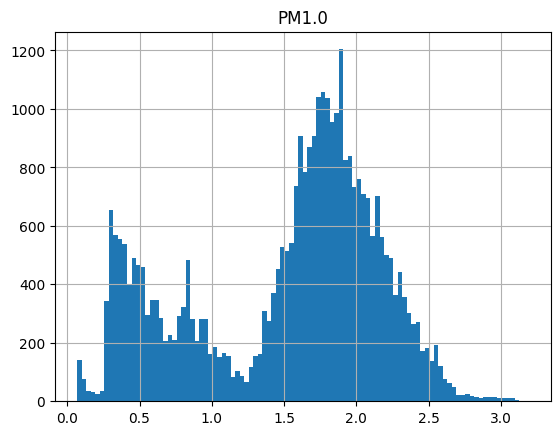

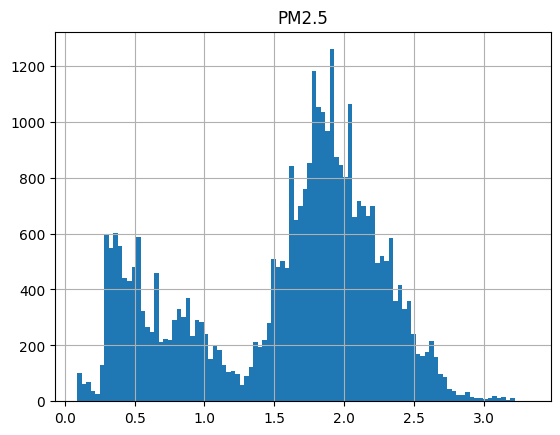

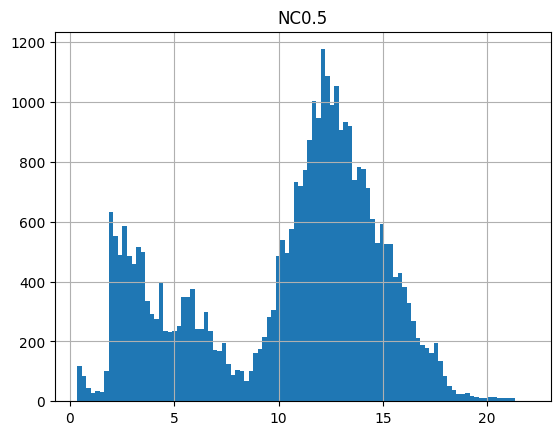

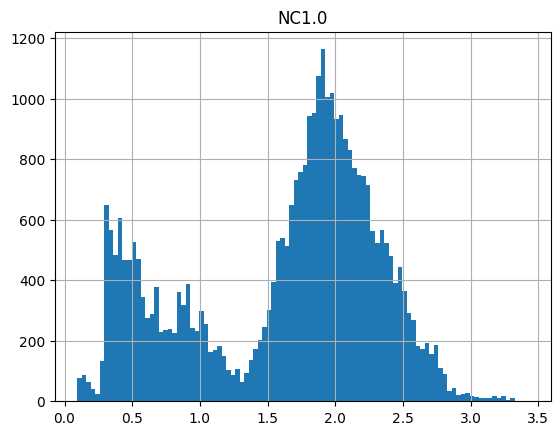

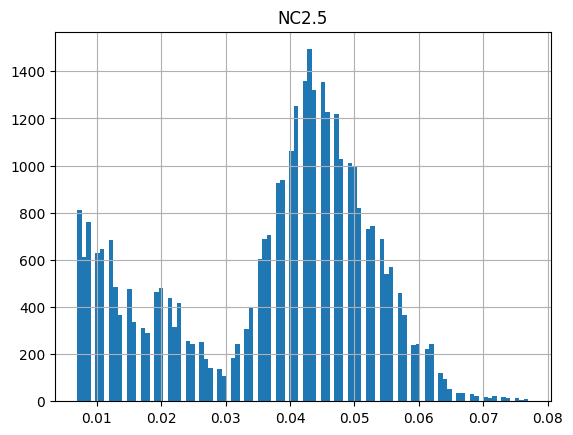

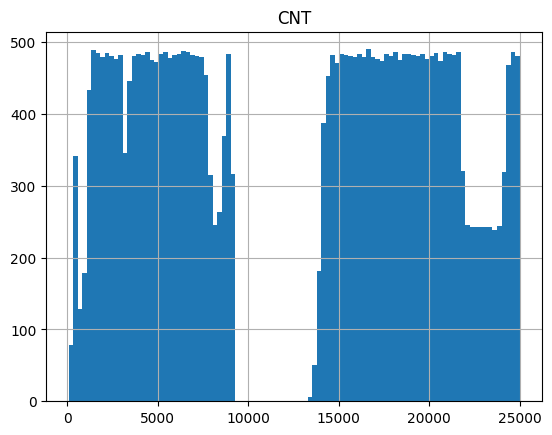

In [20]:
filtered_outlier = data_filtered[['Temperature[C]',	'Humidity[%]',	'TVOC[ppb]',	'eCO2[ppm]',	'Raw_H2',	'Raw_Ethanol',	'Pressure[hPa]',	'PM1.0',	'PM2.5',
           'NC0.5',	'NC1.0',	'NC2.5',	'CNT']]

for col in filtered_outlier:
    data_filtered.hist(col, bins=100)

[[<Axes: title={'center': 'Temperature[C]'}>]]
[[<Axes: title={'center': 'Temperature[C]'}>]]


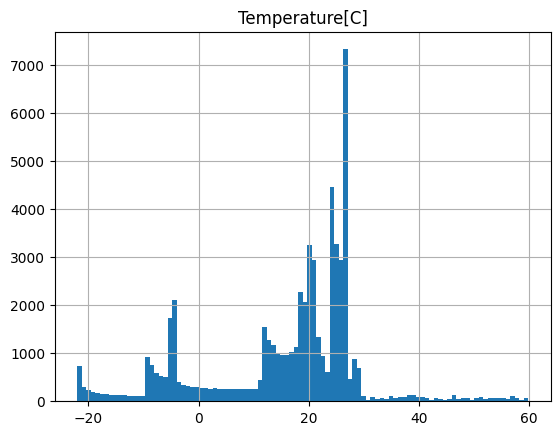

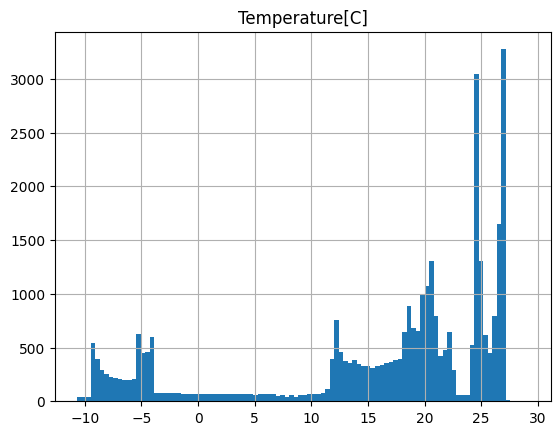

In [21]:
print (data.hist('Temperature[C]', bins=100));
print (data_filtered.hist('Temperature[C]', bins=100));

[[<Axes: title={'center': 'Humidity[%]'}>]]
[[<Axes: title={'center': 'Humidity[%]'}>]]


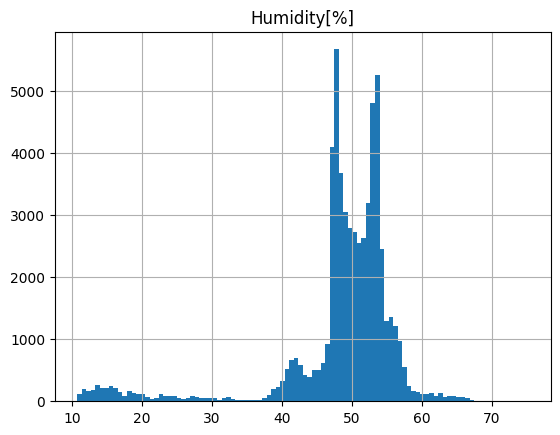

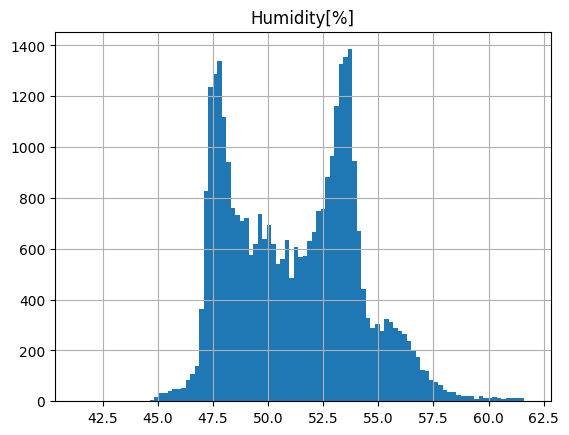

In [22]:
print (data.hist('Humidity[%]', bins=100));
print (data_filtered.hist('Humidity[%]', bins=100));

In [23]:
data_filtered[['Temperature[C]', 'Humidity[%]',	'TVOC[ppb]', 'eCO2[ppm]', 'Raw_H2', 'Raw_Ethanol', 'Pressure[hPa]',	'PM1.0',	'PM2.5',
           'NC0.5', 'NC1.0', 'NC2.5', 'CNT']].corr()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
Temperature[C],1.000000,-0.170483,0.338394,0.162835,-0.387456,-0.385893,-0.343231,0.084017,0.084297,0.083943,0.084321,0.091702,0.271197
Humidity[%],-0.170483,1.000000,-0.233052,-0.128786,0.168060,0.223246,0.243738,-0.241674,-0.241567,-0.241658,-0.241562,-0.231217,-0.211035
TVOC[ppb],0.338394,-0.233052,1.000000,0.377081,-0.817936,-0.975850,-0.979486,0.471068,0.470860,0.471158,0.470819,0.446811,0.963738
eCO2[ppm],0.162835,-0.128786,0.377081,1.000000,-0.473555,-0.386143,-0.328940,0.233538,0.233492,0.233525,0.233538,0.226730,0.233373
Raw_H2,-0.387456,0.168060,-0.817936,-0.473555,1.000000,0.904906,0.814774,-0.148250,-0.149841,-0.147683,-0.150083,-0.209773,-0.692449
Raw_Ethanol,-0.385893,0.223246,-0.975850,-0.386143,0.904906,1.000000,0.958080,-0.374023,-0.374416,-0.373891,-0.374468,-0.378073,-0.913756
Pressure[hPa],-0.343231,0.243738,-0.979486,-0.328940,0.814774,0.958080,1.000000,-0.440308,-0.439924,-0.440466,-0.439844,-0.409158,-0.948850
PM1.0,0.084017,-0.241674,0.471068,0.233538,-0.148250,-0.374023,-0.440308,1.000000,0.999963,0.999988,0.999966,0.967780,0.490744
PM2.5,0.084297,-0.241567,0.470860,0.233492,-0.149841,-0.374416,-0.439924,0.999963,1.000000,0.999957,0.999990,0.969270,0.490385
NC0.5,0.083943,-0.241658,0.471158,0.233525,-0.147683,-0.373891,-0.440466,0.999988,0.999957,1.000000,0.999958,0.967235,0.490877


In [24]:
avg_price = data_filtered.pivot_table(index='Fire_Alarm', values='Temperature[C]', aggfunc='mean')
avg_price.sort_values(ascending=False ,by='Fire_Alarm')


,Temperature[C]
Fire_Alarm,
Yes,15.452128
No,19.270072


In [25]:
YesFire = data_filtered.query('Fire_Alarm == "Yes"')
NoFire = data_filtered.query('Fire_Alarm == "No"')

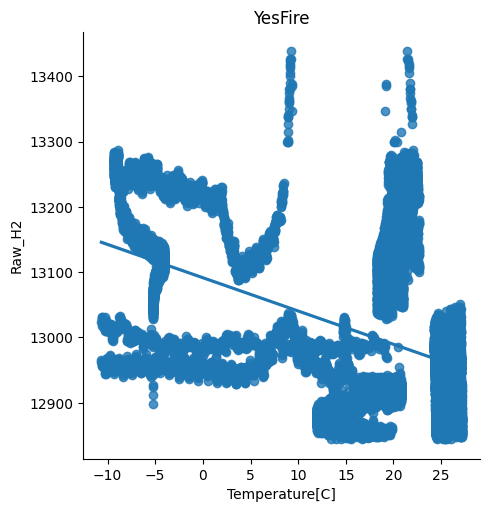

In [26]:
sns.lmplot(x='Temperature[C]', y = 'Raw_H2',data = YesFire);
plt.title("YesFire");

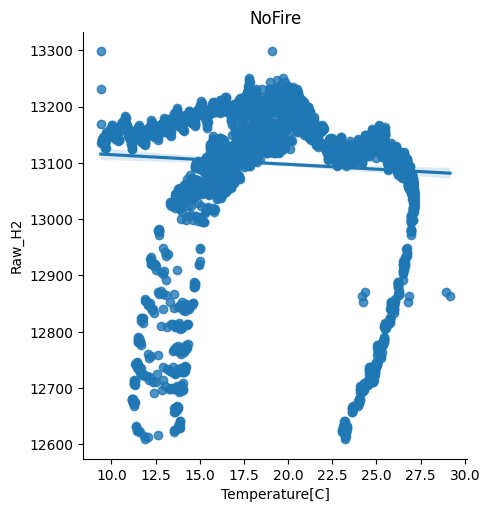

In [27]:
sns.lmplot(x='Temperature[C]', y = 'Raw_H2',data = NoFire);
plt.title("NoFire");

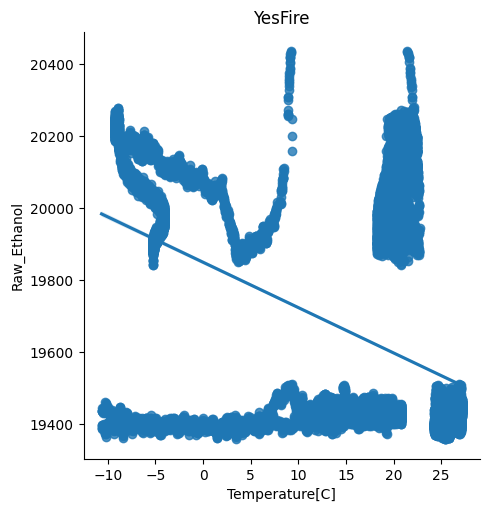

In [28]:
sns.lmplot(x='Temperature[C]', y = 'Raw_Ethanol',data = YesFire);
plt.title("YesFire");

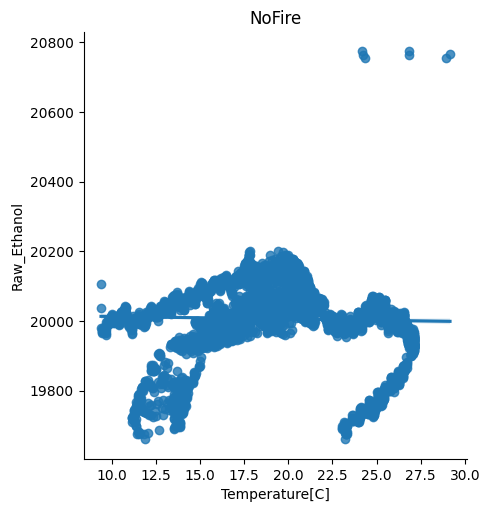

In [29]:
sns.lmplot(x='Temperature[C]', y = 'Raw_Ethanol',data = NoFire);
plt.title("NoFire");

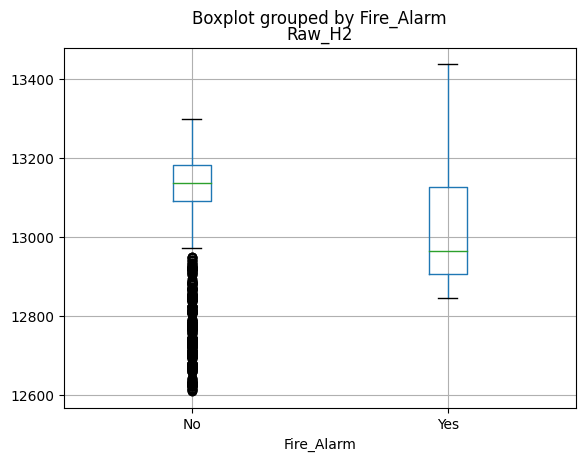

In [30]:
data_filtered.boxplot(by='Fire_Alarm',column='Raw_H2');

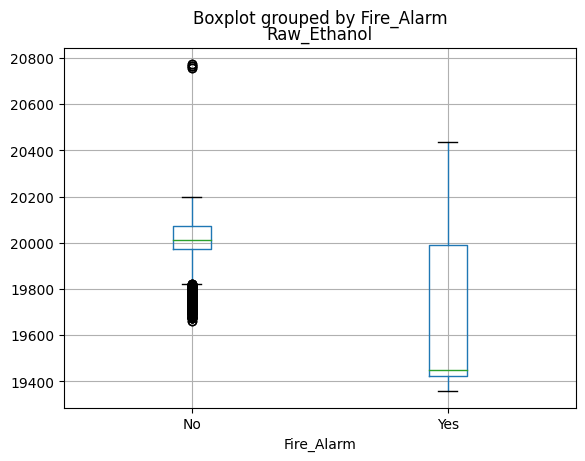

In [31]:
data_filtered.boxplot(by='Fire_Alarm',column='Raw_Ethanol');

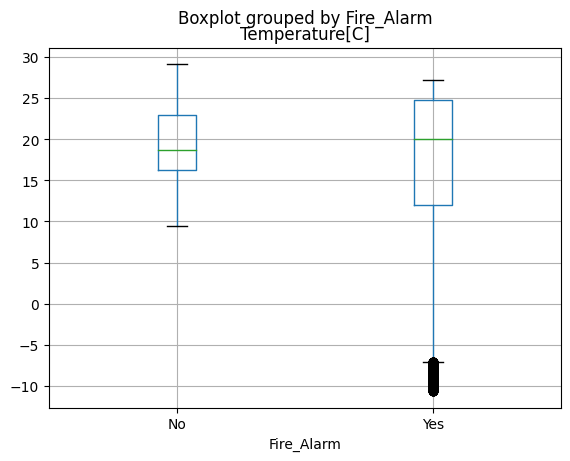

In [32]:
data_filtered.boxplot(by='Fire_Alarm',column='Temperature[C]');

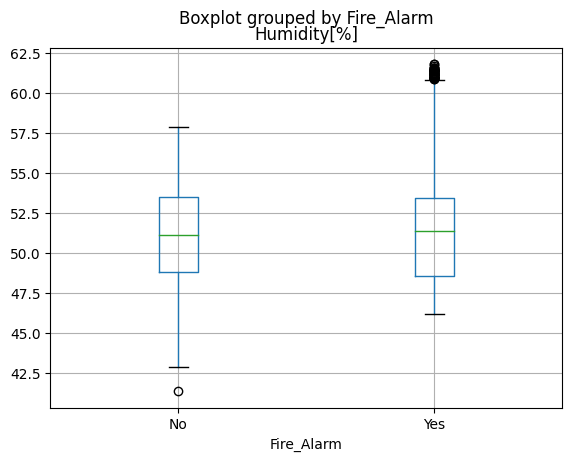

In [33]:
data_filtered.boxplot(by='Fire_Alarm',column='Humidity[%]');

In [34]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34520 entries, 238 to 56971
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             34520 non-null  int64  
 1   Temperature[C]  34520 non-null  float64
 2   Humidity[%]     34520 non-null  float64
 3   TVOC[ppb]       34520 non-null  float64
 4   eCO2[ppm]       34520 non-null  float64
 5   Raw_H2          34520 non-null  float64
 6   Raw_Ethanol     34520 non-null  int64  
 7   Pressure[hPa]   34520 non-null  float64
 8   PM1.0           34520 non-null  float64
 9   PM2.5           34520 non-null  float64
 10  NC0.5           34520 non-null  float64
 11  NC1.0           34520 non-null  float64
 12  NC2.5           34520 non-null  float64
 13  CNT             34520 non-null  int64  
 14  Fire_Alarm      34520 non-null  object 
dtypes: float64(11), int64(3), object(1)
memory usage: 4.2+ MB


In [35]:
data_filtered

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire_Alarm
238,1654733569,23.035,51.58,2.0,400.0,12622.0,19693,939.807,0.07,0.12,0.36,0.131,0.047,238,No
239,1654733570,23.045,51.37,3.0,400.0,12626.0,19690,939.817,0.08,0.14,0.42,0.151,0.055,239,No
240,1654733571,23.056,51.11,1.0,400.0,12626.0,19698,939.810,0.08,0.14,0.43,0.156,0.056,240,No
247,1654733578,23.131,50.08,5.0,400.0,12633.0,19696,939.813,0.09,0.17,0.46,0.189,0.074,247,No
248,1654733579,23.142,50.00,0.0,400.0,12629.0,19704,939.790,0.10,0.17,0.49,0.189,0.072,248,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51227,1654712272,28.910,42.89,31.0,415.0,12871.0,20756,937.625,2.15,2.24,14.81,2.310,0.052,85,No
51229,1654712274,29.160,41.35,31.0,413.0,12864.0,20766,937.625,2.19,2.27,15.07,2.350,0.053,87,No
56967,1655124389,24.173,44.99,17.0,415.0,12863.0,20774,937.630,2.18,2.26,15.00,2.340,0.053,81,No
56968,1655124390,24.212,45.00,27.0,426.0,12853.0,20763,937.634,2.18,2.26,15.00,2.339,0.053,82,No


In [36]:
data_filtered.loc[data_filtered["Fire_Alarm"] == "Yes", "Fire_Alarm"] = 1
data_filtered.loc[data_filtered["Fire_Alarm"] == "No", "Fire_Alarm"] = 0
data_filtered["Fire_Alarm"] = data_filtered["Fire_Alarm"].astype(int)

In [37]:
def reduce_mem_usage(df):
  start_mem = df.memory_usage().sum() / 1024**2
  for col in df.columns:
    col_type = df[col].dtypes
    if str(col_type)[:5] == 'float':
      c_min = df[col].min()
      c_max = df[col].max()
      if c_min>np.finfo('f2').min and c_max < np.finfo('f2').max:
        df[col]=df[col].astype(np.float16)
      elif c_min>np.finfo('f4').min and c_max < np.finfo('f4').max:
        df[col]=df[col].astype(np.float32)
      else:
        df[col]=df[col].astype(np.float64)
    elif str(col_type)[:3] == 'int':
      c_min = df[col].min()
      c_max = df[col].max()
      if c_min>np.iinfo('i1').min and c_max < np.iinfo('i1').max:
        df[col]=df[col].astype(np.int8)
      elif c_min>np.iinfo('i2').min and c_max < np.iinfo('i2').max:
        df[col]=df[col].astype(np.int16)
      elif c_min>np.iinfo('i4').min and c_max < np.iinfo('i4').max:
        df[col]=df[col].astype(np.int32)
      elif c_min>np.iinfo('i8').min and c_max < np.iinfo('i8').max:
        df[col]=df[col].astype(np.int64)
    elif col == 'timestamp':
      df[col]=pd.to_datetime(df[col])
    elif str(col_type)[:8] != 'datetime':
      df[col]=df[col].astype('category')
  end_mem=df.memory_usage().sum() /1024**2
  print('Потребление памяти на', round(start_mem - end_mem, 2), 'Мб (минус', round(100 * (start_mem - end_mem) / start_mem, 1), '%)')
  return df

In [38]:
data_filtered = data_filtered.drop_duplicates()
data_filtered

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire_Alarm
238,1654733569,23.035,51.58,2.0,400.0,12622.0,19693,939.807,0.07,0.12,0.36,0.131,0.047,238,0
239,1654733570,23.045,51.37,3.0,400.0,12626.0,19690,939.817,0.08,0.14,0.42,0.151,0.055,239,0
240,1654733571,23.056,51.11,1.0,400.0,12626.0,19698,939.810,0.08,0.14,0.43,0.156,0.056,240,0
247,1654733578,23.131,50.08,5.0,400.0,12633.0,19696,939.813,0.09,0.17,0.46,0.189,0.074,247,0
248,1654733579,23.142,50.00,0.0,400.0,12629.0,19704,939.790,0.10,0.17,0.49,0.189,0.072,248,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51227,1654712272,28.910,42.89,31.0,415.0,12871.0,20756,937.625,2.15,2.24,14.81,2.310,0.052,85,0
51229,1654712274,29.160,41.35,31.0,413.0,12864.0,20766,937.625,2.19,2.27,15.07,2.350,0.053,87,0
56967,1655124389,24.173,44.99,17.0,415.0,12863.0,20774,937.630,2.18,2.26,15.00,2.340,0.053,81,0
56968,1655124390,24.212,45.00,27.0,426.0,12853.0,20763,937.634,2.18,2.26,15.00,2.339,0.053,82,0


In [39]:
X = data_filtered.drop('Fire_Alarm',axis=1)
Y = data_filtered['Fire_Alarm']

In [40]:
X.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
238,1654733569,23.035,51.58,2.0,400.0,12622.0,19693,939.807,0.07,0.12,0.36,0.131,0.047,238
239,1654733570,23.045,51.37,3.0,400.0,12626.0,19690,939.817,0.08,0.14,0.42,0.151,0.055,239
240,1654733571,23.056,51.11,1.0,400.0,12626.0,19698,939.810,0.08,0.14,0.43,0.156,0.056,240
247,1654733578,23.131,50.08,5.0,400.0,12633.0,19696,939.813,0.09,0.17,0.46,0.189,0.074,247
248,1654733579,23.142,50.00,0.0,400.0,12629.0,19704,939.790,0.10,0.17,0.49,0.189,0.072,248


In [41]:
Y.head()

238    0
239    0
240    0
247    0
248    0
Name: Fire_Alarm, dtype: int32

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.1,random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((31068, 14), (3452, 14), (31068,), (3452,))

In [43]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler(feature_range=(0,1))
X['Temperature[C]'] = scaler.fit_transform(np.reshape(X['Temperature[C]'],(-1,1)))
data_filtered['Temperature[C]'] = scaler.transform(np.reshape(data_filtered['Temperature[C]'],(-1,1)))

x_train['Temperature[C]'] = scaler.transform(np.reshape(x_train['Temperature[C]'],(-1,1)))
x_test['Temperature[C]'] = scaler.transform(np.reshape(x_test['Temperature[C]'],(-1,1)))

In [44]:
x_train.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
45925,1654782274,0.883464,53.43,1356.0,426.0,12945.0,19390,938.678,2.08,2.16,14.31,2.232,0.050,20931
28074,1654764423,0.798825,46.03,142.0,400.0,13160.0,20018,939.670,0.95,0.99,6.55,1.021,0.023,3080
47248,1654783597,0.880701,53.88,1369.0,415.0,12957.0,19385,938.716,2.02,2.10,13.90,2.167,0.049,22254
26756,1654763105,0.672745,55.25,43.0,400.0,13119.0,20010,939.614,0.75,0.78,5.15,0.804,0.018,1762
5282,1654738613,0.038929,53.76,0.0,400.0,13271.0,20232,939.704,2.17,2.25,14.91,2.325,0.053,5282


In [45]:
Y[Y == 0].shape, Y[Y == 1].shape

((4745,), (29775,))

In [46]:
y_test[y_test == 0].shape, y_test[y_test == 1].shape

((443,), (3009,))

In [47]:
from sklearn.utils import resample

neg_class = data_filtered[data_filtered['Fire_Alarm'] == 0]
pos_class = data_filtered[data_filtered['Fire_Alarm'] == 1]

neg_downsampled_class = resample(neg_class,n_samples=len(pos_class),random_state=10)
downsampled_df = pd.concat((neg_downsampled_class,pos_class),axis=0)

downsampled_df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire_Alarm
2063,1654735394,0.820072,53.74,6.0,400.0,13164.0,20046,939.627,0.63,0.66,4.36,0.679,0.015,2063,0
28054,1654764403,0.733022,51.93,168.0,400.0,13165.0,20008,939.674,0.87,0.90,5.96,0.930,0.021,3060,0
2118,1654735449,0.807364,54.09,6.0,400.0,13153.0,20046,939.633,0.75,0.78,5.19,0.809,0.018,2118,0
26837,1654763186,0.743822,48.26,65.0,400.0,13124.0,20002,939.592,0.61,0.64,4.23,0.659,0.015,1843,0
1951,1654735282,0.844510,50.64,46.0,400.0,13135.0,20005,939.589,0.59,0.61,4.06,0.634,0.014,1951,0


In [48]:
X = downsampled_df.drop('Fire_Alarm', axis=1)
Y = downsampled_df['Fire_Alarm']

x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=10,test_size=0.1)

In [49]:
y_train[y_train == 0].shape, y_train[y_train == 1].shape

((26791,), (26804,))

In [50]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score

## KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predict = knn.predict(x_test)

print(confusion_matrix(y_test,predict))
print('\n',classification_report(y_test,predict))
print('roc_auc_score:',roc_auc_score(y_test,predict))

[[2984    0]
 [   0 2971]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2984
           1       1.00      1.00      1.00      2971

    accuracy                           1.00      5955
   macro avg       1.00      1.00      1.00      5955
weighted avg       1.00      1.00      1.00      5955

roc_auc_score: 1.0


In [52]:
from sklearn.model_selection import RandomizedSearchCV

neighbors = np.arange(3,16,2)
params  = dict(n_neighbors=neighbors)
params

{'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15])}

In [53]:
knn = KNeighborsClassifier()
randomized_search = RandomizedSearchCV(knn,params,scoring='accuracy',n_jobs=-1,refit=True)
randomized_search.fit(x_train,y_train)

RandomizedSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15])},
                   scoring='accuracy')

In [54]:
randomized_search.best_params_

{'n_neighbors': 9}

In [55]:
predict = randomized_search.predict(x_test)

In [56]:
print(confusion_matrix(y_test,predict))
print('\n',classification_report(y_test,predict))
print('roc_auc_score:',roc_auc_score(y_test,predict))

[[2984    0]
 [   0 2971]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2984
           1       1.00      1.00      1.00      2971

    accuracy                           1.00      5955
   macro avg       1.00      1.00      1.00      5955
weighted avg       1.00      1.00      1.00      5955

roc_auc_score: 1.0


## Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB

gauss = GaussianNB()
gauss.fit(x_train,y_train)
predict = gauss.predict(x_test)

print(confusion_matrix(y_test,predict))
print('\n',classification_report(y_test,predict))
print('roc_auc_score:',roc_auc_score(y_test,predict))

[[2979    5]
 [   9 2962]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2984
           1       1.00      1.00      1.00      2971

    accuracy                           1.00      5955
   macro avg       1.00      1.00      1.00      5955
weighted avg       1.00      1.00      1.00      5955

roc_auc_score: 0.997647556856584


## Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
predict = lr.predict(x_test)

print(confusion_matrix(y_test,predict))
print('\n',classification_report(y_test,predict))
print('roc_auc_score:',roc_auc_score(y_test,predict))

[[   0 2984]
 [   0 2971]]

               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2984
           1       0.50      1.00      0.67      2971

    accuracy                           0.50      5955
   macro avg       0.25      0.50      0.33      5955
weighted avg       0.25      0.50      0.33      5955

roc_auc_score: 0.5


In [59]:
lr = LogisticRegression()
C = np.logspace(-4, 4, 50)
params = dict(
    C=C,
)

randomized_search = RandomizedSearchCV(lr,params,n_jobs=-1)
randomized_search.fit(x_train,y_train)

RandomizedSearchCV(estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.9...
       8.28642773e-01, 1.20679264e+00, 1.75751062e+00, 2.55954792e+00,
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04])})

In [60]:
randomized_search.best_params_

{'C': 1.2067926406393288}

In [61]:
predict = randomized_search.predict(x_test)

print(confusion_matrix(y_test,predict))
print('\n',classification_report(y_test,predict))
print('roc_auc_score:',roc_auc_score(y_test,predict))

[[   0 2984]
 [   0 2971]]

               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2984
           1       0.50      1.00      0.67      2971

    accuracy                           0.50      5955
   macro avg       0.25      0.50      0.33      5955
weighted avg       0.25      0.50      0.33      5955

roc_auc_score: 0.5


## SVC

In [62]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

In [63]:
linear_svc = LinearSVC()
linear_svc.fit(x_train,y_train)
predict = linear_svc.predict(x_test)

print(confusion_matrix(y_test,predict))
print('\n',classification_report(y_test,predict))
print('roc_auc_score:',roc_auc_score(y_test,predict))

[[   0 2984]
 [   0 2971]]

               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2984
           1       0.50      1.00      0.67      2971

    accuracy                           0.50      5955
   macro avg       0.25      0.50      0.33      5955
weighted avg       0.25      0.50      0.33      5955

roc_auc_score: 0.5


In [64]:
sgd = SGDClassifier()
sgd.fit(x_train,y_train)
predict = sgd.predict(x_test)

print(confusion_matrix(y_test,predict))
print('\n',classification_report(y_test,predict))
print('roc_auc_score:',roc_auc_score(y_test,predict))

[[   0 2984]
 [   0 2971]]

               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2984
           1       0.50      1.00      0.67      2971

    accuracy                           0.50      5955
   macro avg       0.25      0.50      0.33      5955
weighted avg       0.25      0.50      0.33      5955

roc_auc_score: 0.5


In [65]:
linear_svc = LinearSVC()
params = dict(
    penalty=['l1','l2'],
    C=np.array([1,10,20,40,80,100]),
)

randomized_search = RandomizedSearchCV(linear_svc,params,n_jobs=-1)
randomized_search.fit(x_train,y_train)

RandomizedSearchCV(estimator=LinearSVC(), n_jobs=-1,
                   param_distributions={'C': array([  1,  10,  20,  40,  80, 100]),
                                        'penalty': ['l1', 'l2']})

In [66]:
randomized_search.best_params_

{'penalty': 'l2', 'C': 10}

In [67]:
predict = randomized_search.predict(x_test)

print(confusion_matrix(y_test,predict))
print('\n',classification_report(y_test,predict))
print('roc_auc_score:',roc_auc_score(y_test,predict))

[[   0 2984]
 [   0 2971]]

               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2984
           1       0.50      1.00      0.67      2971

    accuracy                           0.50      5955
   macro avg       0.25      0.50      0.33      5955
weighted avg       0.25      0.50      0.33      5955

roc_auc_score: 0.5


In [68]:
sgd = SGDClassifier()
params = dict(
    eta0=[0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
    learning_rate=['constant'],
    alpha=[0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
)

randomized_search = RandomizedSearchCV(sgd,params,n_jobs=-1)
randomized_search.fit(x_train,y_train)

RandomizedSearchCV(estimator=SGDClassifier(), n_jobs=-1,
                   param_distributions={'alpha': [1e-05, 0.0001, 0.001, 0.01,
                                                  0.1, 1],
                                        'eta0': [1e-05, 0.0001, 0.001, 0.01,
                                                 0.1, 1],
                                        'learning_rate': ['constant']})

In [69]:
randomized_search.best_params_

{'learning_rate': 'constant', 'eta0': 0.0001, 'alpha': 0.1}

In [70]:
predict = randomized_search.predict(x_test)
print(confusion_matrix(y_test,predict))
print('\n',classification_report(y_test,predict))
print('roc_auc_score:',roc_auc_score(y_test,predict))

[[   0 2984]
 [   0 2971]]

               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2984
           1       0.50      1.00      0.67      2971

    accuracy                           0.50      5955
   macro avg       0.25      0.50      0.33      5955
weighted avg       0.25      0.50      0.33      5955

roc_auc_score: 0.5


## Итоговая модель классификаторов

In [71]:
classifiers = {
    'KNN метод': KNeighborsClassifier(),
    'Naive Bayes метод': GaussianNB(),
    'Logistic Regression метод': LogisticRegression(),
    'LinearSVC': LinearSVC(),
    'SGDClassifier': SGDClassifier()
}

n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(x_train, np.ravel(y_train))

    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    print(classification_report(y_test,y_pred))

Accuracy (train) for KNN метод: 100.0% 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2984
           1       1.00      1.00      1.00      2971

    accuracy                           1.00      5955
   macro avg       1.00      1.00      1.00      5955
weighted avg       1.00      1.00      1.00      5955

Accuracy (train) for Naive Bayes метод: 99.8% 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2984
           1       1.00      1.00      1.00      2971

    accuracy                           1.00      5955
   macro avg       1.00      1.00      1.00      5955
weighted avg       1.00      1.00      1.00      5955

Accuracy (train) for Logistic Regression метод: 49.9% 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2984
           1       0.50      1.00      0.67      2971

    accuracy                           0

## Реализация метрик

In [72]:
class MyMetrics:
    def __init__(self,y_true,y_pred) -> None:
        self.y_true = np.reshape(y_true,(-1,1))
        self.y_pred = np.reshape(y_pred,(-1,1))
        self.confusion_matrix_ = np.zeros((2,2)).astype(int)

        vector = np.concatenate((self.y_true,self.y_pred),axis=1)
        for x,y in vector:
            self.confusion_matrix_[x][y] += 1

        self.TP = self.confusion_matrix_[0][0]
        self.FP = self.confusion_matrix_[0][1]
        self.FN = self.confusion_matrix_[1][0]
        self.TN = self.confusion_matrix_[1][1]

    def confusion_matrix(self):
        return self.confusion_matrix_
    
    def accuracy(self):
        print(f'accuracy:\n{round((self.TP + self.TN) / self.confusion_matrix_.sum(),2)}\n')
    
    def precision(self):
        self.precis = (self.TN / (self.TN + self.FP))
        print(f'precision:\n{round(self.precis,2)}\n')
    
    def recall(self):
        self.rec = (self.TN / (self.TN + self.FN))
        print(f'recall:\n{round(self.rec,2)}\n')
        
    def f1(self):
        print(f'f1-score:\n{round(2 / (1 / self.precis + 1 / self.rec),2)}\n')

In [73]:
my = MyMetrics(y_test, predict)
my.confusion_matrix()
my.precision()
my.recall()
my.f1()
my.accuracy()

precision:
0.5

recall:
1.0

f1-score:
0.67

accuracy:
0.5



In [74]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2984
           1       0.50      1.00      0.67      2971

    accuracy                           0.50      5955
   macro avg       0.25      0.50      0.33      5955
weighted avg       0.25      0.50      0.33      5955



# Реализация kNN

## Реализуем евклидову метрику для вычисления расстояния между точками

In [75]:
import math
def evcl_metric (dot1,dot2):
    dist = 0
    for i in range (len(dot1)-1):
        dist += (dot1[i] - dot2[i])**2
    return math.sqrt(dist)

## Вычислим расстояния до всех точек обучающей выборки и отберем k соседей

In [76]:
def get_neighb(train, test, k = 1):
    dist = [(train[i][-1], evcl_metric(train[i], test)) for i in range(len(train))]
    dist.sort(key=lambda el: el[1])
    neighb = [dist[i][0] for i in range (k)]
    return neighb

## Посчитаем, сколько объектов каждого класса присутствует среди k ближайших к целевому

In [77]:
def predict(neighb):
    count = {}
    for inst in neighb:
        if inst in count:
            count[inst] +=1
        else:
            count[inst] = 1
    target = max(count.items(), key = lambda x: x[1])[0]
    return target

## Оценим точность прогнозов

In [78]:
def accuracy(test, test_prediction):
    correct = 0
    for i in range(len(test)):
        if test[i][-1] == test_prediction[i]:
            correct+=1
    return (correct/len(test))

## Подготовим данные

In [79]:
from sklearn.datasets import load_digits

In [80]:
digits_dataset = load_digits()

In [81]:
digits_dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [82]:
print(type(digits_dataset['data']))
digits_dataset["data"].shape

<class 'numpy.ndarray'>


(1797, 64)

In [83]:
digits_dataframe = pd.DataFrame(digits_dataset['data'], columns=digits_dataset.feature_names)

In [84]:
digits_dataframe.head(10)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0


In [85]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits_dataset.data[:, 2:4], 
                                                    digits_dataset['target'],
                                                    random_state=0)

print(f'X_train shape: {x_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (1347, 2), y_train shape: (1347,),
X_test shape: (450, 2), y_test shape: (450,)


In [86]:
import numpy as np

x_train_concat = np.concatenate((x_train, y_train.reshape(1347, 1)), axis=1)
x_test_concat = np.concatenate((x_test, y_test.reshape(450, 1)), axis=1)
print(f'X_train shape: {x_train_concat.shape},\n'
      f'X_test shape: {x_test_concat.shape}')

X_train shape: (1347, 3),
X_test shape: (450, 3)


## Вычислим и сравним результаты самописной модели и встроенной

In [87]:
predictions = []
for x in range (len(x_test_concat)):
    neighbors = get_neighb(x_train_concat, x_test_concat[x], k=5)
    result = predict(neighbors)
    predictions.append(result)
my_accuracy = accuracy(x_test_concat, predictions)

In [88]:
knn = KNeighborsClassifier(n_neighbors=5)

In [89]:
knn_model = knn.fit(x_train, y_train)

In [90]:
knn_predictions = knn.predict(x_test)
knn_predictions

array([2, 2, 2, 5, 1, 0, 4, 5, 0, 2, 2, 0, 7, 6, 4, 0, 1, 7, 3, 0, 0, 6,
       2, 4, 2, 2, 6, 3, 2, 8, 6, 8, 6, 0, 2, 1, 0, 4, 8, 1, 1, 7, 3, 1,
       1, 6, 0, 0, 2, 4, 0, 4, 0, 8, 0, 3, 0, 4, 7, 2, 3, 0, 0, 4, 8, 5,
       0, 6, 0, 0, 2, 0, 5, 1, 2, 1, 2, 7, 3, 5, 0, 2, 4, 0, 8, 0, 8, 5,
       4, 2, 6, 4, 9, 1, 2, 3, 4, 5, 5, 5, 5, 0, 3, 6, 0, 0, 6, 4, 4, 2,
       2, 0, 1, 3, 0, 3, 9, 0, 1, 5, 3, 5, 0, 4, 7, 6, 8, 1, 0, 6, 5, 7,
       8, 9, 6, 2, 3, 0, 5, 6, 9, 0, 0, 4, 6, 1, 3, 7, 7, 5, 5, 1, 2, 2,
       6, 1, 6, 1, 7, 0, 6, 2, 1, 0, 5, 1, 5, 0, 9, 0, 4, 0, 9, 1, 0, 0,
       3, 0, 0, 4, 6, 5, 4, 8, 9, 7, 8, 0, 8, 4, 7, 5, 3, 5, 0, 0, 0, 9,
       6, 6, 2, 0, 4, 4, 6, 4, 9, 8, 0, 0, 8, 0, 2, 1, 4, 1, 1, 6, 4, 3,
       2, 1, 1, 3, 3, 6, 1, 3, 2, 4, 4, 5, 2, 7, 0, 7, 2, 0, 0, 4, 1, 0,
       9, 2, 0, 3, 7, 7, 2, 0, 5, 2, 0, 2, 2, 8, 1, 3, 0, 7, 0, 9, 6, 7,
       7, 1, 4, 2, 0, 8, 3, 4, 4, 0, 2, 0, 4, 6, 3, 0, 6, 4, 0, 8, 1, 4,
       2, 1, 7, 4, 6, 9, 1, 5, 1, 5, 4, 4, 5, 3, 0,

In [91]:
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f'My accuracy: {my_accuracy}')
print(f'kNN accuracy: {knn_accuracy}')

My accuracy: 0.24
kNN accuracy: 0.24888888888888888
